# Data Science - Poster Workshop

## How can we analyze data in order to discover new insights that are eventually in?

We are using the Yeast dataset from:     

    Kenta Nakai
    Institue of Molecular and Cellular Biology
	Osaka, University
	1-3 Yamada-oka, Suita 565 Japan
    nakai@imcb.osaka-u.ac.jp
    http://www.imcb.osaka-u.ac.jp/nakai/psort.html
    Donor: Paul Horton (paulh@cs.berkeley.edu)
    Date:  September, 1996
    See also: ecoli database

This dataset is available here in the [UCI Archive](https://archive.ics.uci.edu/dataset/110/yeast)

For this data science poster workshop we will be seeing different ways of classifying the data

## Basic Data Preperation and Exploration

In [9]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np

In [10]:
data = pd.read_csv("yeast/yeast.data", header=None, sep='\s+', engine='python')

data.columns = ["Sequence_Name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "localization_site"]

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sequence_Name      1484 non-null   object 
 1   mcg                1484 non-null   float64
 2   gvh                1484 non-null   float64
 3   alm                1484 non-null   float64
 4   mit                1484 non-null   float64
 5   erl                1484 non-null   float64
 6   pox                1484 non-null   float64
 7   vac                1484 non-null   float64
 8   nuc                1484 non-null   float64
 9   localization_site  1484 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.1+ KB


The goal of this poster is to predict our target "localization_site" based on the 8 features given.

We will perform classification on using multiple different models and evaluate the performance of each model based on its accuracy and precision.

Finaly we will look at overall insights we can draw from this analysis.

localization_site
CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64


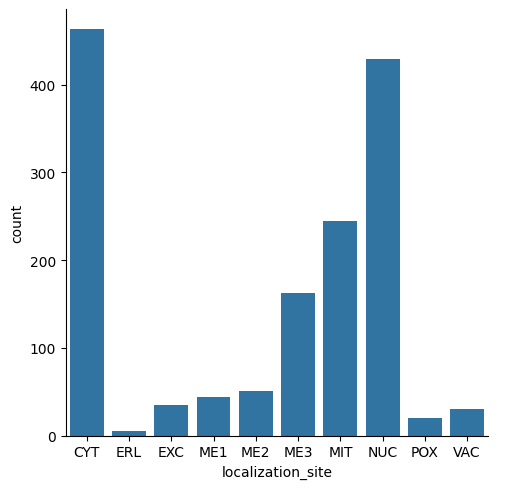

In [11]:
# The number of different occurences for each localization sites
print(data['localization_site'].value_counts())

# Setup localization_site as a category
data["localization_site"] = data["localization_site"].astype('category')

# Plots the number of different occurences for each localization sites
sns.catplot(data, x="localization_site", kind="count")

We can see in the plot above the different amounts of localization sites in the whole dataset. This could impact our later models and their performance.

## Analysis using different Models

In [12]:
# Preparing the data for training

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]

# Encoding the target variable into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [16]:
# Basic Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
forest_predictions = random_forest_model.predict(X_test)

# Support Vector Classification Model
support_vector_model = SVC()
support_vector_model.fit(X_train, y_train)
support_vector_predictions = support_vector_model.predict(X_test)

# Gradient Boost Model for Classification
gradient_boost_model = GradientBoostingClassifier()
gradient_boost_model.fit(X_train, y_train)
gradient_boost_predictions = gradient_boost_model.predict(X_test)

# Neural Network Model using MLP Classifier
neural_network_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000)
neural_network_model.fit(X_train, y_train)
neural_network_predictions = neural_network_model.predict(X_test)

# Model Accuracy Evaluation
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
forest_accuracy = accuracy_score(y_test, forest_predictions)
support_vector_model_accuracy = accuracy_score(y_test, support_vector_predictions)
gradient_boost_model_accuracy = accuracy_score(y_test, gradient_boost_predictions)
neural_network_model_accuracy = accuracy_score(y_test, neural_network_predictions)

print("Logistic Regression Accuracy:             ", logistic_accuracy)
print("Random Forest Accuracy:                   ", forest_accuracy)
print("Support Vector Classification Accuracy:   ", support_vector_model_accuracy)
print("Gradient Boosting Accuracy:               ", gradient_boost_model_accuracy)
print("Neural Network Accuracy:                  ", neural_network_model_accuracy)

print(" ")

# Model Precision Evaluation
logistic_precision = precision_score(y_test, logistic_predictions, average='weighted')
forest_precision = precision_score(y_test, forest_predictions, average='weighted')
support_vector_model_precision = precision_score(y_test, support_vector_predictions, average='weighted')
gradient_boost_model_precision = precision_score(y_test, gradient_boost_predictions, average='weighted')
neural_network_model_precision = precision_score(y_test, neural_network_predictions, average='weighted')

print("Logistic Regression Precision:            ", logistic_precision)
print("Random Forest Precision:                  ", forest_precision)
print("Support Vector Classification Precision:  ", support_vector_model_precision)
print("Gradient Boosting Precision:              ", gradient_boost_model_precision)
print("Neural Network Precision:                 ", neural_network_model_precision)

# print("\nLogistic Regression Classification Report:")
# print(classification_report(y_test, logistic_predictions, labels=label_encoder.transform(label_encoder.classes_), target_names=label_encoder.classes_))
# print("\nRandom Forest Classification Report:")
# print(classification_report(y_test, forest_predictions, labels=label_encoder.transform(label_encoder.classes_), target_names=label_encoder.classes_))

Logistic Regression Accuracy:              0.5858585858585859
Random Forest Accuracy:                    0.6262626262626263
Support Vector Classification Accuracy:    0.6127946127946128
Gradient Boosting Accuracy:                0.5824915824915825
Neural Network Accuracy:                   0.6060606060606061
 
Logistic Regression Precision:             0.5665943489919686
Random Forest Precision:                   0.614308517640491
Support Vector Classification Precision:   0.6110173004900408
Gradient Boosting Precision:               0.5812503422754443
Neural Network Precision:                  0.6014615376539453


We see with the accuracy scores above we may have reached a certain threshold with our models.
We can further explore the limitation by using cross validation.

In [14]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=4, shuffle=True, random_state=42)


logistic_model = LogisticRegression(max_iter=1000)
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=kfold, scoring='accuracy')

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=kfold, scoring='accuracy')

print("Logistic Regression Cross-Validation Accuracy Scores:  ", logistic_cv_scores)
print("Average Logistic Regression CV Accuracy:               ", logistic_cv_scores.mean())
print("Random Forest Cross-Validation Accuracy Scores:        ", forest_cv_scores)
print("Average Random Forest CV Accuracy:                     ", forest_cv_scores.mean())

Logistic Regression Cross-Validation Accuracy Scores:   [0.55218855 0.53872054 0.51851852 0.55743243]
Average Logistic Regression CV Accuracy:                0.5417150104650105
Random Forest Cross-Validation Accuracy Scores:         [0.57239057 0.61952862 0.59259259 0.62162162]
Average Random Forest CV Accuracy:                      0.6015333515333515


Cross Validation
Class imbalance